## Notebook de mise en place d'un CNN ##

In [2]:
# Projet
from src.scripts.train import cnn_handling
from src.scripts.data import feature_engineering
import importlib
importlib.reload(cnn_handling)
from config.paths import DATA_DIR

# Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Modélisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Modélisation d'un CNN maison ###

#### Préparation des données ####

Je charge d'abord les données; les matrices d'images, et leurs métadonnées, notamment la race, valeur cible du modèle.

In [3]:
data = pd.read_json(f'{DATA_DIR}/silver/image_metadata.json')

In [4]:
data.tail()

,image_path,race,width,height,layers,original_img_index,augmented
4699,None,German short-haired pointer,224,224,3,783,True
4700,None,German short-haired pointer,224,224,3,783,True
4701,None,German short-haired pointer,224,224,3,783,True
4702,None,German short-haired pointer,224,224,3,783,True
4703,None,German short-haired pointer,224,224,3,783,True


In [5]:
image_arrays = np.load(f'{DATA_DIR}/silver/image_arrays.npy')

In [6]:
X = image_arrays
y = data.race.values

Les données textuelles de la race des chiens doivent être encodées pour être gérées par le futur CNN.

In [7]:
num_classes = len(data.race.unique())
y, class_names = feature_engineering.encode_dog_races(y, num_classes)

In [8]:
class_names

array(['Border collie', 'German short-haired pointer', 'basset', 'dhole',
       'wire-haired fox terrier'], dtype=object)

Je peux maintenant split mes données en ensembles d'entraînement et de test.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [13]:
np.save(f'{DATA_DIR}/gold/X_train.npy', X_train)
np.save(f'{DATA_DIR}/gold/X_test.npy', X_test)
np.save(f'{DATA_DIR}/gold/y_train.npy', y_train)
np.save(f'{DATA_DIR}/gold/y_test.npy', y_test)


In [21]:
data.race.values

array(['wire-haired fox terrier', 'wire-haired fox terrier',
       'wire-haired fox terrier', ..., 'German short-haired pointer',
       'German short-haired pointer', 'German short-haired pointer'],
      dtype=object)

#### Création d'un premier modèle ####

Les données étant prêtes, je peux créer un premier réseau de neurones convolutionnel; un CNN à 3 couches de convolution et de pooling.

In [8]:
input_shape = image_arrays[0].shape
num_classes = len(data.race.unique())

In [9]:
num_classes

5

In [ ]:
print(y_train.shape)
print(y_test.shape)

(3763, 5)
(941, 5)


In [11]:
cnn_model = cnn_handling.create_cnn_model(input_shape, num_classes)

/Users/gaspardhurez/csprojects/repos/openclassrooms/p6-dog-pictures-classifier/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

#### Entraînement ####

J'entraîne le modèle à partir de mon dataset d'images.

In [ ]:
history = cnn_model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/2
118/118 ━━━━━━━━━━━━━━━━━━━━ 110s 930ms/step - accuracy: 0.2256 - loss: 1.6078 - val_accuracy: 0.2136 - val_loss: 1.6091
Epoch 2/2
118/118 ━━━━━━━━━━━━━━━━━━━━ 100s 839ms/step - accuracy: 0.2226 - loss: 1.6078 - val_accuracy: 0.2136 - val_loss: 1.6091


In [ ]:
cnn_model.save("model_cnn_dog_breeds.h5")

#### Evaluation ####

J'utilise le dataset de test pour mesurer la précision de mon CNN.

In [16]:
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step


In [17]:
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       188
           1       0.00      0.00      0.00       181
           2       0.21      1.00      0.35       201
           3       0.00      0.00      0.00       179
           4       0.00      0.00      0.00       192

    accuracy                           0.21       941
   macro avg       0.04      0.20      0.07       941
weighted avg       0.05      0.21      0.08       941

Confusion Matrix:
 [[  0   0 188   0   0]
 [  0   0 181   0   0]
 [  0   0 201   0   0]
 [  0   0 179   0   0]
 [  0   0 192   0   0]]


/Users/gaspardhurez/csprojects/repos/openclassrooms/p6-dog-pictures-classifier/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gaspardhurez/csprojects/repos/openclassrooms/p6-dog-pictures-classifier/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gaspardhurez/csprojects/repos/openclassrooms/p6-dog-pictures-classifier/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set 

Les résultats sont vraiment très mauvais, car il semble que le CNN prédise uniquement la classe 2; je vérifie donc si mes données ne sont pas déséquilibrées.

{0: 712, 1: 731, 2: 849, 3: 721, 4: 750}


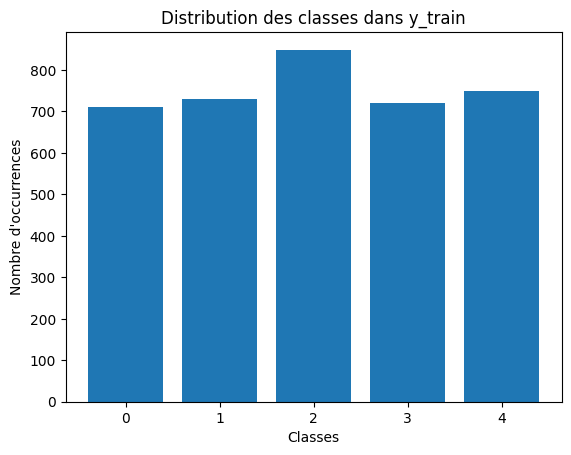

In [ ]:
y_train_classes = np.argmax(y_train, axis=1)
unique, counts = np.unique(y_train_classes, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(class_distribution)


In [ ]:
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel("Classes")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des classes dans y_train")
plt.show()

Bien que la classe 2 soit un peu plus représentée, les données ne semblent pas fortement déséquilibrées, signe que l'architecture actuelle du modèle ne parvient pas à déceler des tendances pertinentes au sein des images.  
Je vais donc tester d'optimiser les hyper-paramètres; puis de comparer les résultats avec un modèle qui a fait ses preuves dans la littérature, via le Transfer Learning.

#### Optimisation des hyper-paramètres ####

In [ ]:
best_model = cnn_handling.optimize_cnn_hyperparams(X_train, y_train, X_test, y_test, input_shape, num_classes)

In [ ]:
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

In [ ]:
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

Même après optimisation des hyper-paramètres, le CNN continue d'afficher un overfitting clair et une incapacité à gérer le déséquilibre entre les classes.